<a href="https://colab.research.google.com/github/HansHenseler/masdav2024/blob/main/Part_3_Exercise_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Plaso super timeline exercises and explanations

Part 3

Master of Advanced Studies in Digital Forensics & Cyber Investigation

Data Analytics and Visualization for Digital Forensics

(c) Hans Henseler, 2024


# Part 3


## 1 Installing plaso tools in the colab notebook

In [ ]:
# various install steps to install plaso tools and dependencies to get plaso working in colab
# -y option is to skip user interaction
# some packages need to be deinstalled and reinstalled to resolve dependencies
# these steps take 3-5 minutes to complete on a fresh colab instance
!add-apt-repository -y ppa:gift/stable
!apt update
!apt-get update
!apt install plaso-tools

In [2]:
!log2timeline.py --version
!psort.py --version
!pinfo.py --version

plaso - log2timeline version 20240308
plaso - psort version 20240308
plaso - pinfo version 20240308


In [3]:
from google.colab import drive
drive.mount('/content/gdrive')
plaso_file = 'gdrive/MyDrive/mus2019ctf.plaso'
!ls -l $plaso_file

Mounted at /content/gdrive
-rw------- 1 root root 493842432 Aug  5 12:39 gdrive/MyDrive/mus2019ctf.plaso


In [28]:
# Downdload the filter_windows.txt file
filter_windows = "/content/gdrive/MyDrive/Testdata/filter_windows.yml"
!ls -l  $filter_windows

-r-------- 1 root root 10062 Aug  5 12:03 /content/gdrive/MyDrive/Testdata/filter_windows.yml


# Exercises

## 1 Timeline explorer

In [4]:
# Create a l2tcsv csv file for mus2019ctf and download it to your computer
# we can use timeline explorer to load this format (this takes 5-7 minutes)
#
!psort.py --status_view none -o l2tcsv $plaso_file -w mus2019_l2tcsv.csv
#
# download timeline explorer from https://ericzimmerman.github.io/#!index.md
# download the csv file from your colab notebook to your local machine and
# visualise it with timeline explorer.

only date and time values and/or a limited predefined set of output fields. It
is strongly recommend to use an alternative output format like: dynamic.

Waiting for 15 second to give you time to cancel.

Processing completed.


## 2 Colorized Super Timeline Template for Log2timeline Output Files

In [ ]:
# In 2012 Rob Lee from SANS released an Excel Timeline Template to be used to automatically colorize your timelines.
# try this procedure on one of the l2tcsv exports that you have created earlier. Follow the instructions here":
#
# https://www.sans.org/blog/digital-forensic-sifting-colorized-super-timeline-template-for-log2timeline-output-files/

## 3 Load csv data from psort.py in a dataframe and visualise the data

In [5]:
# 3a load the csv file that you created in exercise 1

import pandas as pd
df = pd.read_csv("mus2019_l2tcsv.csv")
df

,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra
0,00/00/0000,--:--:--,-,....,WEBHIST,MSIE WebCache container record,Expiration Time,-,DESKTOP-0QT8017,URL: https://wbd.ms/windows-app-web-link,URL: https://wbd.ms/windows-app-web-link Acces...,2,NTFS:\Users\Administrator\AppData\Local\Micros...,89403,-,esedb/msie_webcache,sha256_hash: 90495802063637f718636ad4863ce74ce...
1,00/00/0000,--:--:--,-,....,LNK,Windows Shortcut,Not a time,-,DESKTOP-0QT8017,Unknown,File size: 0 File attribute flags: 0x00000000 ...,2,NTFS:\Users\Administrator\AppData\Roaming\Micr...,94873,-,olecf/olecf_automatic_destinations/lnk,sha256_hash: 1b40a264e98c6d12c61893d1bb8adb845...
2,00/00/0000,--:--:--,-,....,LNK,Windows Shortcut,Not a time,-,DESKTOP-0QT8017,Unknown,File size: 0 File attribute flags: 0x00000000 ...,2,NTFS:\Users\Administrator\AppData\Roaming\Micr...,94873,-,olecf/olecf_automatic_destinations/lnk,sha256_hash: 1b40a264e98c6d12c61893d1bb8adb845...
3,00/00/0000,--:--:--,-,....,LNK,Windows Shortcut,Not a time,-,DESKTOP-0QT8017,Unknown,File size: 0 File attribute flags: 0x00000000 ...,2,NTFS:\Users\Administrator\AppData\Roaming\Micr...,94873,-,olecf/olecf_automatic_destinations/lnk,sha256_hash: 1b40a264e98c6d12c61893d1bb8adb845...
4,00/00/0000,--:--:--,-,....,LNK,Windows Shortcut,Not a time,-,DESKTOP-0QT8017,Unknown,File size: 0 File attribute flags: 0x00000000 ...,2,NTFS:\Users\Administrator\AppData\Roaming\Micr...,94873,-,olecf/olecf_automatic_destinations/lnk,sha256_hash: 1b40a264e98c6d12c61893d1bb8adb845...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692971,01/19/2093,08:27:49,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\oobe\firstlogonanim.exe,path: c:\windows\system32\oobe\firstlogonanim....,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...
692972,06/12/2098,14:51:15,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\sdiagnhost.exe,path: c:\windows\system32\sdiagnhost.exe produ...,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...
692973,07/14/2096,21:17:09,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\winlogon.exe,path: c:\windows\system32\winlogon.exe product...,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...
692974,03/02/2100,06:33:42,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\csrss.exe,path: c:\windows\system32\csrss.exe product_na...,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...


In [6]:
# date and time are separate columns. Create a new datetime column that combines these two:

import datetime as dt
df['datetime'] = df['date'] + 'T' + df['time']
df['datetime'] = pd.to_datetime(df['datetime'],errors='coerce')
df


<ipython-input-6-85a5e2e939ea>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['datetime'] = pd.to_datetime(df['datetime'],errors='coerce')


,date,time,timezone,MACB,source,sourcetype,type,user,host,short,desc,version,filename,inode,notes,format,extra,datetime
0,00/00/0000,--:--:--,-,....,WEBHIST,MSIE WebCache container record,Expiration Time,-,DESKTOP-0QT8017,URL: https://wbd.ms/windows-app-web-link,URL: https://wbd.ms/windows-app-web-link Acces...,2,NTFS:\Users\Administrator\AppData\Local\Micros...,89403,-,esedb/msie_webcache,sha256_hash: 90495802063637f718636ad4863ce74ce...,NaT
1,00/00/0000,--:--:--,-,....,LNK,Windows Shortcut,Not a time,-,DESKTOP-0QT8017,Unknown,File size: 0 File attribute flags: 0x00000000 ...,2,NTFS:\Users\Administrator\AppData\Roaming\Micr...,94873,-,olecf/olecf_automatic_destinations/lnk,sha256_hash: 1b40a264e98c6d12c61893d1bb8adb845...,NaT
2,00/00/0000,--:--:--,-,....,LNK,Windows Shortcut,Not a time,-,DESKTOP-0QT8017,Unknown,File size: 0 File attribute flags: 0x00000000 ...,2,NTFS:\Users\Administrator\AppData\Roaming\Micr...,94873,-,olecf/olecf_automatic_destinations/lnk,sha256_hash: 1b40a264e98c6d12c61893d1bb8adb845...,NaT
3,00/00/0000,--:--:--,-,....,LNK,Windows Shortcut,Not a time,-,DESKTOP-0QT8017,Unknown,File size: 0 File attribute flags: 0x00000000 ...,2,NTFS:\Users\Administrator\AppData\Roaming\Micr...,94873,-,olecf/olecf_automatic_destinations/lnk,sha256_hash: 1b40a264e98c6d12c61893d1bb8adb845...,NaT
4,00/00/0000,--:--:--,-,....,LNK,Windows Shortcut,Not a time,-,DESKTOP-0QT8017,Unknown,File size: 0 File attribute flags: 0x00000000 ...,2,NTFS:\Users\Administrator\AppData\Roaming\Micr...,94873,-,olecf/olecf_automatic_destinations/lnk,sha256_hash: 1b40a264e98c6d12c61893d1bb8adb845...,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
692971,01/19/2093,08:27:49,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\oobe\firstlogonanim.exe,path: c:\windows\system32\oobe\firstlogonanim....,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...,2093-01-19 08:27:49
692972,06/12/2098,14:51:15,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\sdiagnhost.exe,path: c:\windows\system32\sdiagnhost.exe produ...,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...,2098-06-12 14:51:15
692973,07/14/2096,21:17:09,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\winlogon.exe,path: c:\windows\system32\winlogon.exe product...,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...,2096-07-14 21:17:09
692974,03/02/2100,06:33:42,UTC,....,AMCACHE,Amcache Registry Entry,Link Time,-,DESKTOP-0QT8017,path: c:\windows\system32\csrss.exe,path: c:\windows\system32\csrss.exe product_na...,2,NTFS:\Windows\appcompat\Programs\Amcache.hve,40,-,winreg/amcache,sha256_hash: d378471609f296b5893595e663b92b4cb...,2100-03-02 06:33:42


In [7]:
df.dtypes


,0
date,object
time,object
timezone,object
MACB,object
source,object
sourcetype,object
type,object
user,object
host,object
short,object


In [8]:
# 3b List the different values for the source column (source types)

df['source'].unique()

array(['WEBHIST', 'LNK', 'REG', 'AMCACHE', 'PE', 'FILE', 'EVT', 'LOG',
       'OLECF'], dtype=object)

In [9]:
# or we can count the values in column source
#
df['source'].value_counts()

,count
source,
FILE,294705
REG,284373
EVT,111102
LOG,1296
WEBHIST,1237
LNK,94
PE,67
AMCACHE,61
OLECF,41


In [10]:
# turn the new datetime column into an index for this dataframe

df = df.set_index('datetime')

In [11]:
# 3c create a heatmap showing the number of events per day (horizontally) per hour (vertically)

log_by_day_hour = pd.pivot_table( df, fill_value=0.0, columns=[df.index.date], index=[df.index.hour], aggfunc="count")['source']
log_by_day_hour


,1979-06-01,1988-07-07,2001-12-27,2003-03-20,2004-02-17,2004-03-12,2005-09-14,2009-05-26,2010-03-18,2011-06-28,...,2074-06-06,2078-01-24,2081-01-26,2081-08-18,2093-01-19,2096-05-22,2096-07-14,2098-06-12,2098-10-13,2100-03-02
datetime,,,,,,,,,,,,,,,,,,,,,
0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<Axes: ylabel='datetime'>

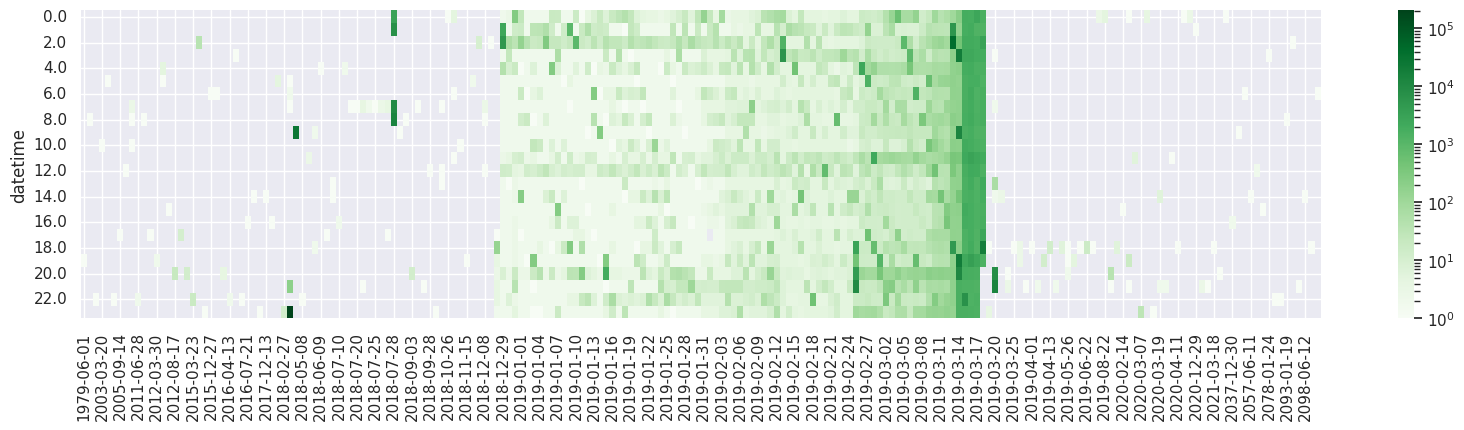

In [12]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

sns.set(rc = {'figure.figsize':(20,4)})
sns.heatmap(log_by_day_hour, cmap="Greens",norm=LogNorm())


In [13]:
# 3d create a streamgraph (see slides day 1) showing source type counts for the time period '2018-12-28' to '2019-03-19'
# hint: use stackplot() from matplotlib, see https://www.python-graph-gallery.com/streamchart-basic-matplotlib

In [14]:
# From 3b we have:
#
# FILE       294708
# REG        283847
# EVT        111102
# LOG          1302
# WEBHIST      1127
# LNK            92
# PE             61
# OLECF          41
# AMCACHE         8
#
# We use the stackplot() function of matplotlib. For more details see:
#
# https://www.python-graph-gallery.com/streamchart-basic-matplotlib
#

dfc = df[["date","source"]].value_counts().reset_index(name='counts')
dfc['date'] = pd.to_datetime(dfc['date'],errors='coerce')
dfc = dfc.dropna()
start_date = '2018-12-28'
end_date   = '2019-03-19'
dfc = dfc[(dfc['date'] > start_date) & (dfc['date'] <= end_date)]
dfc


,date,source,counts
1,2019-03-14,FILE,68642
2,2019-03-15,FILE,46164
3,2019-03-16,FILE,45336
4,2019-03-18,FILE,43453
5,2019-03-13,FILE,39418
...,...,...,...
383,2019-03-02,LOG,1
390,2019-01-25,REG,1
393,2019-03-04,WEBHIST,1
401,2019-01-22,REG,1


In [15]:
counts_per_day_per_source = pd.pivot_table( dfc, fill_value=0.0, columns=[dfc.date], index=[dfc.source], values = 'counts', aggfunc="sum")
counts_per_day_per_source

date,2018-12-29,2018-12-30,2018-12-31,2019-01-01,2019-01-02,2019-01-03,2019-01-04,2019-01-05,2019-01-06,2019-01-07,...,2019-03-10,2019-03-11,2019-03-12,2019-03-13,2019-03-14,2019-03-15,2019-03-16,2019-03-17,2019-03-18,2019-03-19
source,,,,,,,,,,,,,,,,,,,,,
AMCACHE,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
EVT,4340.0,145.0,450.0,509.0,115.0,414.0,163.0,419.0,416.0,458.0,...,2447.0,2103.0,2384.0,1946.0,4509.0,1813.0,1726.0,1574.0,6404.0,0.0
FILE,52.0,4.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,2.0,0.0,4.0,39418.0,68642.0,46164.0,45336.0,37669.0,43453.0,0.0
LNK,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,8.0,0.0,0.0,0.0,17.0,0.0
LOG,22.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13.0,16.0,27.0,57.0,62.0,34.0,34.0,45.0,232.0,0.0
OLECF,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,13.0,0.0
REG,3356.0,4.0,0.0,12.0,0.0,1.0,9.0,2.0,1.0,2.0,...,10.0,25.0,20.0,15410.0,485.0,180.0,51.0,51.0,332.0,0.0
WEBHIST,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,2.0,2.0,1.0,51.0,0.0,3.0,4.0,308.0,5.0


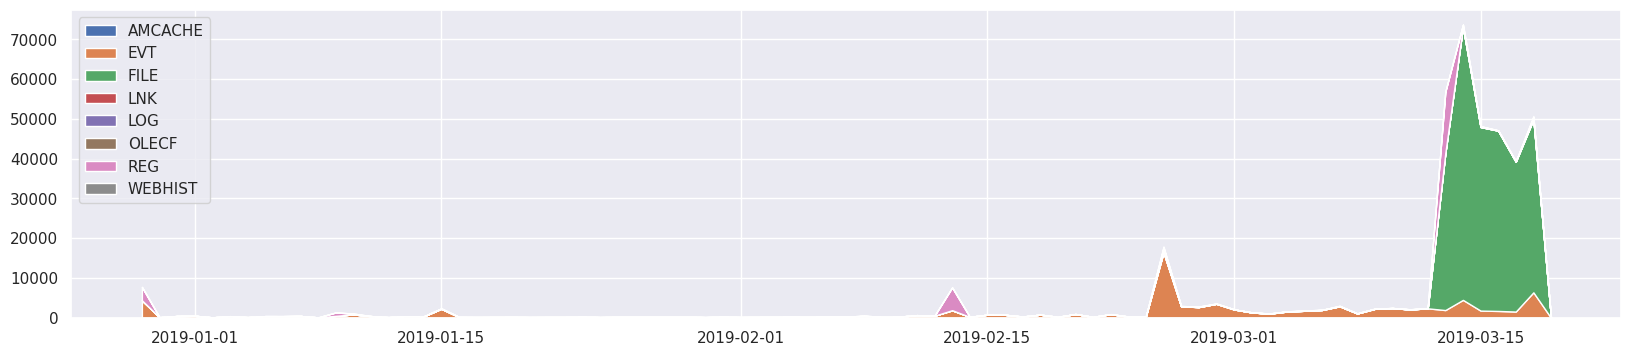

In [16]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.stackplot(counts_per_day_per_source.columns, counts_per_day_per_source.values, labels = counts_per_day_per_source.index,)
ax.legend(loc='upper left')
plt.show()



In [17]:
# the large values of some source types (EVTand REG) prevent the other sources types from being visible.
# using the log function we can normalize the counts using log()
#

dfc['normalized'] = np.log(dfc.counts)
dfc

,date,source,counts,normalized
1,2019-03-14,FILE,68642,11.136660
2,2019-03-15,FILE,46164,10.739956
3,2019-03-16,FILE,45336,10.721857
4,2019-03-18,FILE,43453,10.679435
5,2019-03-13,FILE,39418,10.581978
...,...,...,...,...
383,2019-03-02,LOG,1,0.000000
390,2019-01-25,REG,1,0.000000
393,2019-03-04,WEBHIST,1,0.000000
401,2019-01-22,REG,1,0.000000


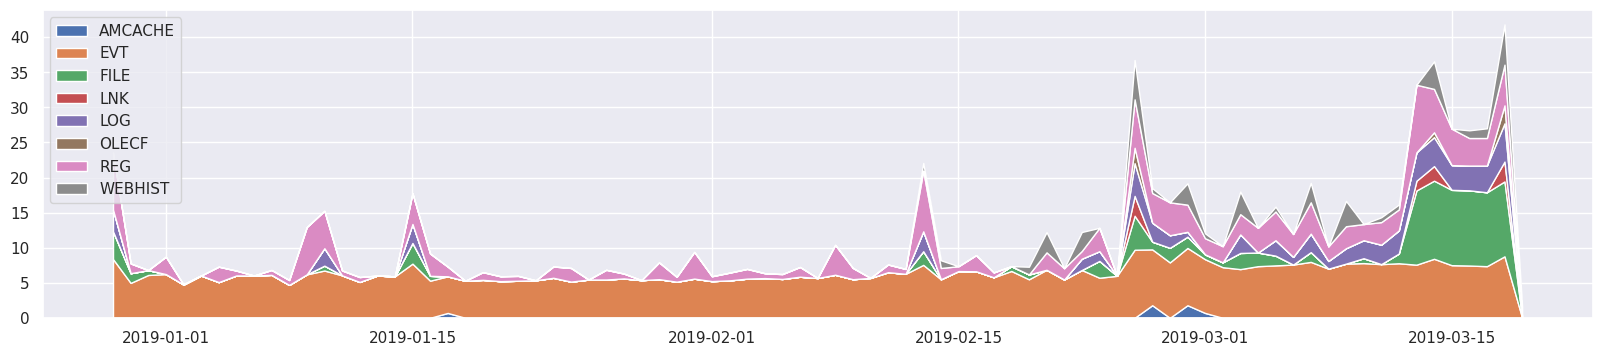

In [18]:
fig, ax = plt.subplots()
counts_per_day_per_source_log = pd.pivot_table( dfc, fill_value=0.0, columns=[dfc.date], index=[dfc.source], values = 'normalized', aggfunc="sum")
ax.stackplot(counts_per_day_per_source_log.columns, counts_per_day_per_source_log.values, labels = counts_per_day_per_source_log.index)
ax.legend(loc='upper left')
plt.show()


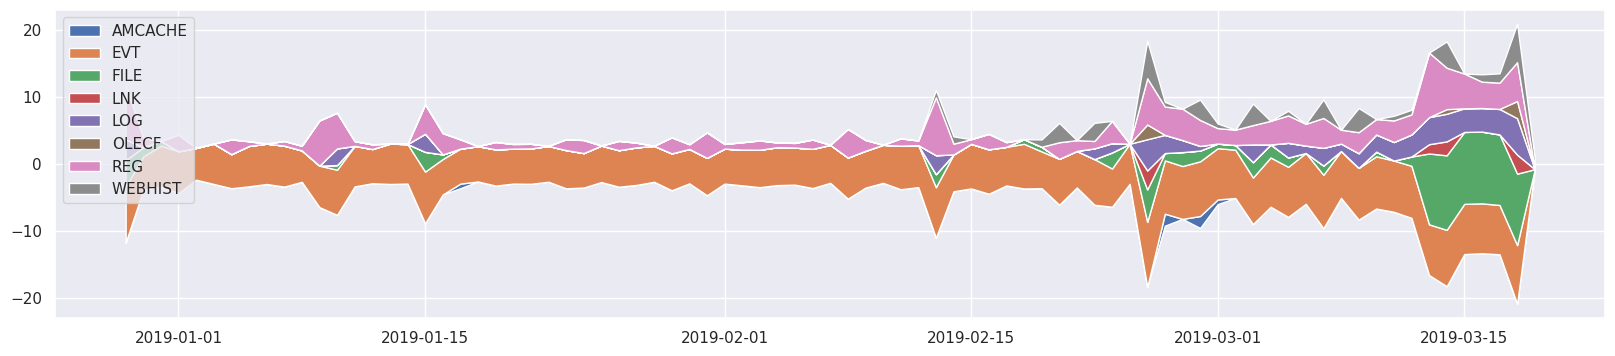

In [19]:
# use the baseline="sym" in stackplot to get a symmetrical stackplot around the baseline
#
fig, ax = plt.subplots()
counts_per_day_per_source_log = pd.pivot_table( dfc, fill_value=0.0, columns=[dfc.date], index=[dfc.source], values = 'normalized', aggfunc="sum")
ax.stackplot(counts_per_day_per_source_log.columns, counts_per_day_per_source_log.values, labels = counts_per_day_per_source_log.index,baseline="sym")
ax.legend(loc='upper left')
plt.show()

## 4 Analyse the M57 Patents scenario disk images from Digital Corpora

In [21]:
# The M57 Patents scenario is described here https://digitalcorpora.org/corpora/scenarios/m57-patents-scenario
#
# Download the redacted drive images from Charlie, Pat, Jo and Terry (take the last ones). This takes app 8 minutes:
#
# https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/charlie-2009-12-11.E01
# https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/jo-2009-12-11-002.E01
# https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/pat-2009-12-11.E01
#
#

!curl -o charlie-2009-12-11.E01 https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/charlie-2009-12-11.E01
!curl -o jo-2009-12-11-002.E01 https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/jo-2009-12-11-002.E01
!curl -o pat-2009-12-11.E01 https://digitalcorpora.s3.amazonaws.com/corpora/scenarios/2009-m57-patents/drives-redacted/pat-2009-12-11.E01




  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 3694M  100 3694M    0     0  11.1M      0  0:05:30  0:05:30 --:--:-- 14.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5664M  100 5664M    0     0  11.1M      0  0:08:25  0:08:25 --:--:-- 13.6M
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 5861M  100 5861M    0     0  10.3M      0  0:09:24  0:09:24 --:--:-- 17.6M


In [29]:
# start with processing pat (3 minutes)
#

!log2timeline.py -f $filter_windows  --parsers winxp --storage_file pat.plaso pat-2009-12-11.E01 --status_view none
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w pat.csv pat.plaso
#
# add a column to the file indicating that these lines are from pat and store the results in m57patents.csv
# first take the header and add the column name: computer
#
!cat pat.csv | head -n 1 |  sed 's/$/,computer/' > m57patents.csv
!cat pat.csv | tail -n +2 |  sed 's/$/,pat/' >> m57patents.csv
!wc m57patents.csv

2024-08-19 18:07:18,135 [INFO] (MainProcess) PID:40783 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OPTIONAL]	unable to determine version information for: flor
[OK]


Source path		: /content/pat-2009-12-11.E01
Source type		: storage media image
Filter file		: /content/gdrive/MyDrive/Testdata/filter_windows.yml
Processing time		: 00:00:00

Processing started.
Processing completed.

Processing completed.
  179081  3538966 64032143 m57patents.csv


In [30]:
# then with processing Charlie (3 minutes)
#
!log2timeline.py -f $filter_windows  --parsers winxp --storage_file charlie.plaso charlie-2009-12-11.E01 --status_view none
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w charlie.csv charlie.plaso
#
# add a column to the file indicating that these lines are from pat and store the results in m57patents.csv
#
!cat charlie.csv | tail -n +2 |  sed 's/$/,charlie/' >> m57patents.csv
!wc m57patents.csv

2024-08-19 18:10:52,697 [INFO] (MainProcess) PID:41669 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OPTIONAL]	unable to determine version information for: flor
[OK]


Source path		: /content/charlie-2009-12-11.E01
Source type		: storage media image
Filter file		: /content/gdrive/MyDrive/Testdata/filter_windows.yml
Processing time		: 00:00:00

Processing started.
Processing completed.

Processing completed.
   336260   6021574 115156482 m57patents.csv


In [31]:
# then with processing Jo (3 minutes)
#
!log2timeline.py -f $filter_windows  --parsers winxp --storage_file jo.plaso jo-2009-12-11-002.E01 --status_view none
!psort.py --status_view none -o dynamic --additional_fields "data_type, drive_type, drive_serial_number,droid_file_identifier"  -w jo.csv jo.plaso
#
# add a column to the file indicating that these lines are from pat and store the results in m57patents.csv
#
!cat jo.csv | tail -n +2 |  sed 's/$/,jo/' >> m57patents.csv
!wc m57patents.csv

2024-08-19 18:14:01,367 [INFO] (MainProcess) PID:42443 <artifact_definitions> Determined artifact definitions path: /usr/share/artifacts
Checking availability and versions of dependencies.
[OPTIONAL]	unable to determine version information for: flor
[OK]


Source path		: /content/jo-2009-12-11-002.E01
Source type		: storage media image
Filter file		: /content/gdrive/MyDrive/Testdata/filter_windows.yml
Processing time		: 00:00:00

Processing started.
Processing completed.

Processing completed.
   478869   8271080 162255562 m57patents.csv


In [32]:
import pandas as pd
import numpy as np
import datetime as dt

mydateparser = lambda x: dt.datetime.strptime(x, '%Y-%m-%dT%H:%M:%S.%f%z') if x != '0000-00-00T00:00:00.000000+00:00'  else ''
df_m57 = pd.read_csv(
    "m57patents.csv",
    dtype={'message':str},
    parse_dates = ['datetime'],
    date_parser=mydateparser,
    index_col='datetime'
    )

<ipython-input-32-76eca003c551>:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df_m57 = pd.read_csv(


In [33]:
df_m57.head()

,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier,computer
datetime,,,,,,,,,,,,
NaT,Not a time,REG,USBStor Registry Key,[HKEY_LOCAL_MACHINE\System\ControlSet001\Enum\...,winreg/windows_usbstor_devices,LaCie Rugged FW/USB USB Device,-,windows:registry:usbstor:instance,-,-,-,pat
NaT,Not a time,REG,USBStor Registry Key,[HKEY_LOCAL_MACHINE\System\ControlSet001\Enum\...,winreg/windows_usbstor_devices,LaCie Rugged FW/USB USB Device,-,windows:registry:usbstor:instance,-,-,-,pat
NaT,Not a time,REG,USBStor Registry Key,[HKEY_LOCAL_MACHINE\System\ControlSet002\Enum\...,winreg/windows_usbstor_devices,LaCie Rugged FW/USB USB Device,-,windows:registry:usbstor:instance,-,-,-,pat
NaT,Not a time,REG,USBStor Registry Key,[HKEY_LOCAL_MACHINE\System\ControlSet002\Enum\...,winreg/windows_usbstor_devices,LaCie Rugged FW/USB USB Device,-,windows:registry:usbstor:instance,-,-,-,pat
NaT,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Visited: Administrator@about:Home Nu...,msiecf,NTFS:\Documents and Settings\Administrator\Loc...,-,msiecf:url,-,-,-,pat


In [34]:
df_m57.describe

<bound method NDFrame.describe of                             timestamp_desc   source  \
datetime                                              
NaT                             Not a time      REG   
NaT                             Not a time      REG   
NaT                             Not a time      REG   
NaT                             Not a time      REG   
NaT                        Expiration Time  WEBHIST   
...                                    ...      ...   
2038-01-18 00:00:00+00:00  Expiration Time  WEBHIST   
2039-11-20 18:36:32+00:00  Expiration Time  WEBHIST   
2039-11-20 19:33:10+00:00  Expiration Time  WEBHIST   
2039-11-25 03:40:02+00:00  Expiration Time  WEBHIST   
2039-11-25 03:40:06+00:00  Expiration Time  WEBHIST   

                                          source_long  \
datetime                                                
NaT                              USBStor Registry Key   
NaT                              USBStor Registry Key   
NaT                              USBStor Registry Key   
NaT                              USBStor Registry Key   
NaT                        MSIE Cache File URL record   
...                                               ...   
2038-01-18 00:00:00+00:00  MSIE Cache File URL record   
2039-11-20 18:36:32+00:00  MSIE Cache File URL record   
2039-11-20 19:33:10+00:00  MSIE Cache File URL record   
2039-11-25 03:40:02+00:00  MSIE Cache File URL record   
2039-11-25 03:40:06+00:00  MSIE Cache File URL record   

                                                                     message  \
datetime                                                                       
NaT                        [HKEY_LOCAL_MACHINE\System\ControlSet001\Enum\...   
NaT                        [HKEY_LOCAL_MACHINE\System\ControlSet001\Enum\...   
NaT                        [HKEY_LOCAL_MACHINE\System\ControlSet002\Enum\...   
NaT                        [HKEY_LOCAL_MACHINE\System\ControlSet002\Enum\...   
NaT                        Location: Visited: Administrator@about:Home Nu...   
...                                                                      ...   
2038-01-18 00:00:00+00:00  Location: Cookie:administrator@mozilla.com/ Nu...   
2039-11-20 18:36:32+00:00  Location: Cookie:administrator@microsoft.com/ ...   
2039-11-20 19:33:10+00:00  Location: Cookie:administrator@interclick.com/...   
2039-11-25 03:40:02+00:00  Location: Cookie:jo@interclick.com/ Number of ...   
2039-11-25 03:40:06+00:00  Location: Cookie:jo@microsoft.com/ Number of h...   

                                                   parser  \
datetime                                                    
NaT                        winreg/windows_usbstor_devices   
NaT                        winreg/windows_usbstor_devices   
NaT                        winreg/windows_usbstor_devices   
NaT                        winreg/windows_usbstor_devices   
NaT                                                msiecf   
...                                                   ...   
2038-01-18 00:00:00+00:00                          msiecf   
2039-11-20 18:36:32+00:00                          msiecf   
2039-11-20 19:33:10+00:00                          msiecf   
2039-11-25 03:40:02+00:00                          msiecf   
2039-11-25 03:40:06+00:00                          msiecf   

                                                                display_name  \
datetime                                                                       
NaT                                           LaCie Rugged FW/USB USB Device   
NaT                                           LaCie Rugged FW/USB USB Device   
NaT                                           LaCie Rugged FW/USB USB Device   
NaT                                           LaCie Rugged FW/USB USB Device   
NaT                        NTFS:\Documents and Settings\Administrator\Loc...   
...                                                                      ...   
2038-01-18 00:00:00+00:00  NTFS:\

In [35]:
df_m57_clean = df_m57.loc[df_m57.index.notnull()]
df_m57_clean

,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier,computer
datetime,,,,,,,,,,,,
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://searchportal.information.com/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://searchportal.information.com/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://www.stocksonlinebrokers.com/ ...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2000-01-01 00:00:00+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://static.ak.fbcdn.net/rsrc.php/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2000-01-01 00:00:00+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://static.ak.fbcdn.net/rsrc.php/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
...,...,...,...,...,...,...,...,...,...,...,...,...
2038-01-18 00:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@mozilla.com/ Nu...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo
2039-11-20 18:36:32+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@microsoft.com/ ...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo
2039-11-20 19:33:10+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@interclick.com/...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo


In [36]:
df_m57_clean = df_m57_clean[df_m57_clean.index < '1-1-2021']

# use the following restriction to zoom in
# df_m57_clean = df_m57_clean[(df_m57_clean.index > '29-10-2009') & (df_m57_clean.index < '18-12-2009')]

In [37]:
df_m57_clean

,timestamp_desc,source,source_long,message,parser,display_name,tag,data_type,drive_type,drive_serial_number,droid_file_identifier,computer
datetime,,,,,,,,,,,,
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://searchportal.information.com/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://searchportal.information.com/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
1997-07-26 05:00:00+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: http://www.stocksonlinebrokers.com/ ...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2000-01-01 00:00:00+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://static.ak.fbcdn.net/rsrc.php/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
2000-01-01 00:00:00+00:00,Content Modification Time,WEBHIST,MSIE Cache File URL record,Location: http://static.ak.fbcdn.net/rsrc.php/...,msiecf,NTFS:\Documents and Settings\Pat\Local Setting...,-,msiecf:url,-,-,-,pat
...,...,...,...,...,...,...,...,...,...,...,...,...
2019-11-18 18:41:50+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@www.msn.com/ Nu...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo
2019-11-18 18:41:50+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@www.msn.com/ Nu...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo
2019-11-18 18:41:54+00:00,Expiration Time,WEBHIST,MSIE Cache File URL record,Location: Cookie:administrator@imrworldwide.co...,msiecf,NTFS:\Documents and Settings\Administrator\Coo...,-,msiecf:url,-,-,-,jo


In [38]:
import matplotlib.pyplot as plt

# etc. create a pivot summing the number of events per day per computer and then plot that. Also see exercise

df_m57bydaycomp = pd.pivot_table( df_m57_clean, fill_value=0.0, columns=[df_m57_clean.index.date], index=[df_m57_clean.computer], aggfunc="count")['source']

In [39]:
df_m57bydaycomp

,1980-01-01,1997-07-26,2000-01-01,2001-01-01,2001-07-19,2001-08-20,2001-08-21,2001-08-22,2002-01-24,2002-07-18,...,2019-11-11,2019-11-14,2019-11-16,2019-11-17,2019-11-18,2019-11-21,2019-11-23,2019-11-28,2019-12-07,2020-01-01
computer,,,,,,,,,,,,,,,,,,,,,
charlie,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
jo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.0,0.0,2.0,0.0,0.0,0.0
pat,0.0,3.0,17.0,2.0,1.0,23.0,8.0,2.0,1.0,1.0,...,1.0,14.0,1.0,1.0,1.0,2.0,0.0,1.0,2.0,69.0


<Axes: ylabel='computer'>

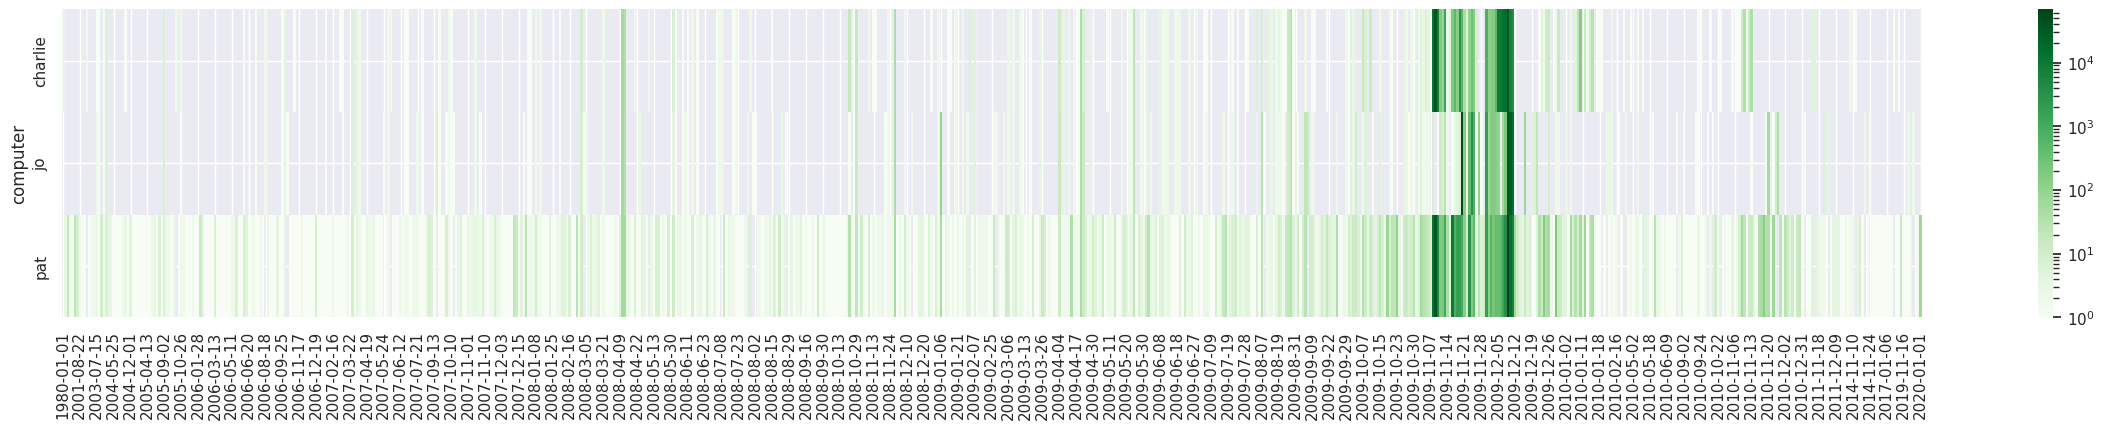

In [40]:
import seaborn as sns
from matplotlib.colors import LogNorm, Normalize

sns.set(rc = {'figure.figsize':(30,4)})
sns.heatmap(df_m57bydaycomp, cmap="Greens",norm=LogNorm())

In [ ]:
# can you find out what happened on the busy days?